# Linear Regression

> **Citation**: machine learning and pattern recognition by Christopher M. Bishop ( University College of London ML course )

### Beta Distribution

The beta distribution describes continuous random-variables in the range [0,1], the distribution is:

$$Beta(\mu|a,\ b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$$

In this distribution, $\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}$ is the normalisation factor, which ensures that the integral of this function is equal to 1. For now, we will ignore the normalisation:

$$Beta(\mu|a,\ b) \propto \mu^{a-1}(1-\mu)^{b-1}$$

$$E[\mu|a,\ b] = \frac{a}{a+b}$$ 

$$Var[\mu|a,\ b] = \frac{ab}{(a+b)^2(a+b+1)}$$

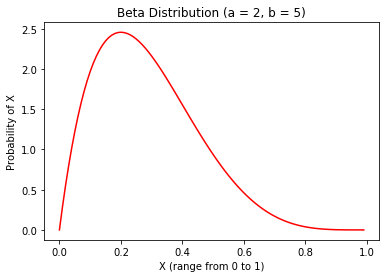

In [89]:
%matplotlib inline
# import beta distribution function
# beta.pdf(x)
import matplotlib
import numpy as np
from scipy.stats import beta
from matplotlib import pyplot as plt

x = np.arange(0,1,0.01) # generate an array from 0 - 1
a, b = 2, 5 #shape parameters
plt.plot(x, beta.pdf(x,a,b), 'r')
plt.ylabel("Probability of X")
plt.xlabel("X (range from 0 to 1)")
plt.title("Beta Distribution (a = 2, b = 5)")
plt.show()

### Beta Prior
Using Bayes theory our posterior looks like: 

(The probability of $p(\mathcal{D}|\mu) = \mu^m(1-\mu)^I$, like tossing a coin $m+I$ times, with $m$ times of success)

$$p(\mu|\mathcal{D}) \propto p(\mathcal{D}|\mu)p(\mu) \propto \mu^m(1-\mu)^I\mu^{a-1}(1-\mu)^{b-1}$$

our posterior will looks like:

$$p(\mu|\mathcal{D}) = \mu^{(m+a-1)}(1-\mu)^{(I+b-1)}$$

after normalised we have:

$$p(\mu|\mathcal{D}) = Beta(\mu|m+a,\ I+b)$$

When our posterior takes the same form as the prior, then the prior is said to be **conjugate**

$$E_{posterior}[\mu|\mathcal{D}] = \frac{a+m}{a+m+b+I}$$

** a and b ** as effective prior observations. If **a = 1** and **b = 1**, then we have a flat prior.

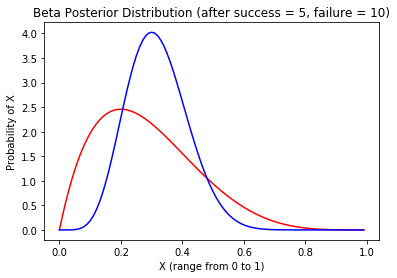

In [90]:
#we toss coin 15 times, and have (5 successes and 10 failures)
m, i = 5, 10
#because of our initial input posterior changed
plt.plot(x, beta.pdf(x, a, b),'r', x, beta.pdf(x, a+m, b+i), 'b')
plt.ylabel("Probability of X")
plt.xlabel("X (range from 0 to 1)")
plt.title("Beta Posterior Distribution (after success = 5, failure = 10)")
plt.show()

### The Gaussian Distribution

$$p(x|\mu, \sigma^2) = \mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}}exp[-\frac{1}{2\sigma^2}(x-\mu)^2]$$

suppose we draw $N$ samples **x** = $(x_1, \dots, x_N)^T$ **i.i.d** from Gaussian distribution $x_n \sim \mathcal{N}(x|\mu, \sigma^2)$

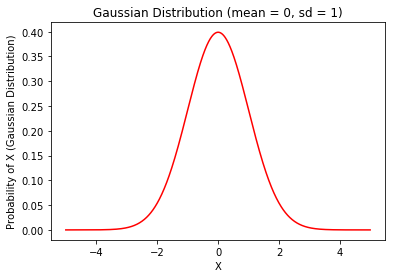

In [91]:
#implementation of gaussian normal distribution probability density function
def gaussian_prob(x, mu, sd):
    return 1/ (np.sqrt(2 * np.pi * sd**2)) * np.exp(-(x-mu)**2/2*(sd**2))

#plot the gaussian distribution probability function
x = np.arange(-5,5,0.01)
mean, sd = 0, 1 #start with standard-distribution
plt.plot(x, gaussian_prob(x, mean, sd),'r')
plt.ylabel("Probability of X (Gaussian Distribution)")
plt.xlabel("X")
plt.title("Gaussian Distribution (mean = 0, sd = 1)")
plt.show()

now we will calculate the likelihood of this function:

$$p(x|\mu, \sigma^2) = \prod_{n=1}^{N}\mathcal{N}(x_n|\mu, \sigma^2)$$

log maximum likelihood:

$$ln\ p(\mathbf{x} | \mu, \sigma^2) = -\frac{1}{2\sigma^2}\sum_{n=1}^{N}(x_n-\mu)^2 - \frac{N}{2}ln\sigma^2 - \frac{N}{2}ln(2\pi)$$

Differentiating and setting to $0$ gives:

$$\mu_{ML} = \frac{1}{N}\sum_{n=1}{N}x_n$$

$$\sigma^2_{ML} = \frac{1}{N}\sum_{n=1}{N}(x_n-\mu_{ML})^2$$

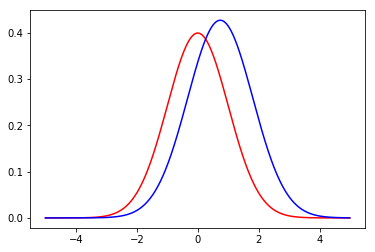

In [102]:
def maximum_likelihood_approximation(samples):
    """
    parameters
    ----------
      samples - a vector of samples
    returns
    -------
      mean_ml - a maximum likelihood estimate of the mean
      var_ml - a maximum likelihood estimate of the variance
    """
    N = samples.size
    mean_ml = np.sum(samples)/N
    var_ml = np.sum((samples-mean_ml)**2)/N
    return mean_ml, var_ml

#set random seed
np.random.seed(0)
#bias of the maximum likelihood estimate reduce with larger number of data points observed 
sample_size = 10

true_mean = 0
true_sd = 1
data = np.random.normal(true_mean, true_sd, sample_size)
est_mean, est_var = maximum_likelihood_approximation(data)
x = np.arange(-5, 5, 0.01)

plt.plot(x, gaussian_prob(x, true_mean, true_sd), 'r', x, gaussian_prob(x, est_mean, est_var), 'b')
plt.show()

### Curve fitting: Regression

Suppose we have **N** inputs and **N** targets:

$$\vec{x} = (x_1, \ldots, x_N)^T$$

$$\vec{t} = (t_1, \ldots, t_N)^T$$

Assume given $\mathbf{x}$, then $\mathbf{t}$ has a Gaussian with mean $y(x;\mathbf{w})$

$$p(t|x,\mathbf{w},\beta) = \mathcal{N}(t|y(x;\mathbf{w}), \beta^-1)$$ 

where $\beta$ is the **precision (inverse variance)**

The equation is similar to saying that:  $t = y(x;\mathbf{w})+\epsilon$ where $\epsilon \sim \mathcal{N}(.|\ 0,\beta^{-1})$

## Maximum likelihood curve fitting

Now we are using $\{x,\mathbf{t}\}$ to find the maximum likelihood parameters for $\mathbf{w}$ and $\beta$. The revised likelihood:

$$p(\mathbf{t}|x, \mathbf{w}) = \prod_{n=1}^{N}\mathcal{N}(t_n|\ y(x_n;\mathbf{w}),\beta^{-1})$$

Take the log:

$$ln\ p(\mathbf{t}|\ x, \mathbf{w}) = -\frac{\beta}{2}\sum_{n=1}^{N}[y(x_n;\mathbf{w})-t_n]^2 + \frac{N}{2}ln\beta - \frac{N}{2}ln(2\pi)$$

minimising the log likelihood, we get:

$$E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^{N}[y(x_n;\mathbf{w})-t_n]^2$$

Once we find out $\mathbf{w}_{ML}$, we can then figure out $\mathbf{\beta}_{ML}$

$$p(t|x, \mathbf{w}_{ML}, \beta_{ML}) = \mathcal{N}(t|y(x;\mathbf{w}_{ML}),\beta_{ML})$$

### A Bayesian Approach to Curve Fitting (Gaussian)

#### Bayesian Strategy:
As before, we have samples $\mathbf{x} = (x_1, \ldots, x_n)^T$ from $\mathcal{N}(x_i|\mu, \sigma^2)$
- Assume we know the variance 
- define prior on $\mu,\ \ p(\mu)$

#### Choose a Prior $p(\mu)$
Because our likelihood is :

$$p(x|\mu) = \prod_{n=1}^{N}\mathcal{N}(x_n|\mu, \sigma^2)$$

Then from Bayes rule, our posterior:

$$p(\mu|\mathbf{x}) \propto p(x|\mu)p(\mu)$$

and our likelihood has form:

$$p(x|\mu) \propto \frac{1}{\sqrt{2 \pi \sigma^2}}exp[-\frac{1}{2\sigma^2}(x_n-\mu)^2]$$

so $p(\mu)$ should have similar **Gaussian** form

$$p(\mu) \propto exp[-\frac{(\mu-m_0)^2}{2s_0^2}] \propto \mathcal{N}(\mu|m_0, s_0^2)$$

from **conjugacy**, we know the posterior will also be Gaussian, so:

$$p(\mu|\mathbf{x}) = \mathcal{N}(\mu|m_N, s_N^2)$$

with sample size **N**, we get:

$$m_N = \frac{\sigma^2}{Ns_0^2+\sigma^2}m_0 + \frac{Ns_0^2}{Ns_0^2+\sigma^2}\mu_{ML}$$

$$\frac{1}{s_N^2} = \frac{1}{s_0^2} + \frac{N}{\sigma^2}$$

From the observation, we can see the **differences** between ML and bayesian approach:
* $m_N$ compromise between $m_0$ and $\mu_{ML}$
* For large $N$, $m_N \approx \mu_{ML}$
* For large $N$, $s^2_N \approx 0$, variance of estimate vanishes. (The distribution graph shrinks)
* As $s_0^2 \rightarrow \infty$, then $s^2_N \rightarrow \sigma^2/N$

In [ ]:
def bayesian_estimates(N, mean_0, var_0, mu_ml, var):
    mean_N = (var * mean_0 + N * var_0 * mu_ml)/(N * var_0 + var) 
    var_N = 1/(1/var_0 + N/var)
    return mean_N, var_N

# Linear Regression

A simple linear model for vector inputs $\mathbf{x}$ with bias term

$$\begin{align}
y &= w_0 + \sum_{d=1}^{D-1}w_dx_d \\
& =\left( \begin{array}{cc}
w_0  \\
w_1  \\
\vdots \\
w_{D-1}
\end{array} \right)^T
%
\left( \begin{array}{cc}
1   \\
x_1 \\
\vdots \\
x_{D-1}
\end{array} \right) \\
& = \mathbf{w}^T\mathbf{x}
\end{align}
$$
<img src="./figures/neuron.png" alt="Drawing" style="width: 200px;"/>

For a point on the decision line: 

$$y(x) = 0$$
$$\frac{\mathbf{w}^T \mathbf{x}}{||\mathbf{w}||} = -\frac{w_0}{||\mathbf{w}||}$$

## Solving the linear model

So we begin with our simple **sum of square errors** loss function

$$E_D(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^{N}(t_n - \mathbf{w}^T\mathbf{x}_n)^2$$

we can write this in **matrix** notation as:

$$E_D(\mathbf{w}) = \frac{1}{2}(\mathbf{t}-\mathbf{X}\mathbf{w})^T(\mathbf{t}-\mathbf{X}\mathbf{w})$$

with $\mathbf{t}$ is collected targets and $(N \times D)$ matrix of inputs

$$ \mathbf{X} = 
\left(
\begin{array}{cc}
    x_{00} & x_{10} & \ldots & x_{0(D-1)}\\
    x_{10} & x_{11} & \ldots & x_{1(D-1)}\\
    \vdots & \vdots & \ddots & \vdots\\
    x_{N0} & x_{N1} & \ldots & x_{N(D-1)}\\
\end{array}
\right) = \mathbf{x}_1^T
$$

we want to minimise our error function: $E_D(\mathbf{w})$. Differentiate and set to 0:

$$\nabla_wE_D(\mathbf{w}) = \nabla_\mathbf{w}[\frac{1}{2}(\mathbf{t}-\mathbf{X}\mathbf{w})^T(\mathbf{t}-\mathbf{X}\mathbf{w}] = 0$$

**Gradient of dot product:**
$$\nabla_\mathbf{w}\mathbf{w}^T\mathbf{v} = \mathbf{v}$$
**Product rule:**
$$\nabla_\mathbf{x}u(\mathbf{x})v(\mathbf{x}) = v\nabla_\mathbf{x}u + u\nabla_\mathbf{x}v$$
**Chain rule:**
$$\nabla_\mathbf{z}f(g(\mathbf{z})) = \frac{df}{dg}\nabla_\mathbf{z}g$$

Use **Gradient of dot product** rule, we get:

$$\nabla_\mathbf{w}E_D(\mathbf{w}) = \frac{1}{2}\nabla_\mathbf{w}(\mathbf{t}-\mathbf{X}\mathbf{w})$$

Because $\nabla_\mathbf{w}(\mathbf{t}-\mathbf{X}\mathbf{w}) = \mathbf{X}^T(\mathbf{t}-\mathbf{X}\mathbf{w})$  (following the **Chain rule**)

Therefore, we can see that the optimal $\mathbf{w^*}$ satisfy:
$$\mathbf{X}^T(\mathbf{t}-\mathbf{X}\mathbf{w^*}) = 0$$

rearrange we get:
$$\mathbf{X}^T\mathbf{X}\mathbf{w^*} = \mathbf{X}^T\mathbf{t}$$

**ML Weights Linear Regression:**
$$\mathbf{w}_{ML} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t}$$

**Here we are using a hypothetical function**
$$f_{true}(\mathbf{x}) = \sin(2\pi(\mathbf{x}-1)^4)$$

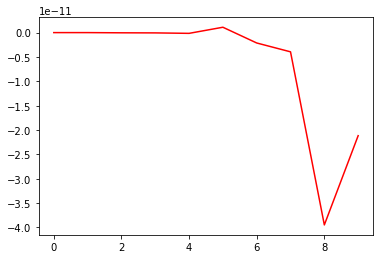

In [111]:
# here we define an arbitrary function
def predict_function(x):
    return np.sin(2*np.pi*(2*x-1)**4)
x = np.arange(0,10,1)
y = predict_function(x)
plt.plot(x, y, 'r')

In [105]:
import numpy.linalg as linalg
#ml weights linear regression
def ml_weights(x, t):
    m_X = np.matrix(x)
    v_t = np.matrix(t).reshape((len(t),1))
    weights = linalg.inv(m_X.transpose() * m_X)*m_X.transpose() * v_t
    return np.array(weights).flatten()

#input model and weights and predicted values
def linear_model_predict(m_X, weights):
    ys = np.matrix(m_X)*np.matrix(weights).reshape((len(weights),1))
    return np.array(ys).flatten()

Feature maps are important in determine the shape of our predicting function

In [135]:
# this is the feature mapping for a polynomial of given degree in 1d
def feature_mapping(inputs, degree):
    """
    Create a design matrix from a 1d array of input values, where columns
    of the output are powers of the inputs from 0 to degree (inclusive)

    So if input is: inputs=np.array([x1, x2, x3])  and degree = 4 then
    output will be design matrix:
        np.array( [[  1.    x1**1   x1**2   x1**3   x1**4   ]
                   [  1.    x2**1   x2**2   x2**3   x2**4   ]
                   [  1.    x3**1   x3**2   x3**3   x3**4   ]])
    """
    expanded_inputs = []
    for i in range(degree+1):
        expanded_inputs.append(inputs**i)
    """
    expanded_inputs =
    np.array( [[ x1**1  x2**1  x3**1 ]
               [ x1**2  x2**2  x3**2 ]
               [ x1**3  x2**3  x3**3 ]
               [ x1**4  x2**4  x3**4 ]])
    ----
    Here we will transpose expanded_inputs
    """
    return np.array(expanded_inputs).transpose()

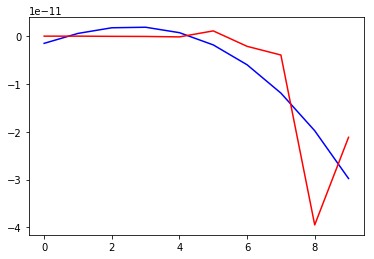

In [136]:
xs = feature_mapping(x, 3)
w = ml_weights(xs, y)
ys = linear_model_predict(xs, w)
plt.plot(x, ys, 'b', x, y, 'r')
plt.show()

We can see that high degrees of polynomial equation is not adequate in predicting $\sin(x)$. To resolve this, we will need to update our feature map function which helps explore other higher dimensional relationship.

In [152]:
def sin_poly_feature_mapping(a_X, degree):
    m_X = []
    for i in range(degree):
        m_X.append(a_X ** i)
        m_X.append(np.sin(a_X**i))
    return np.array(m_X).transpose()

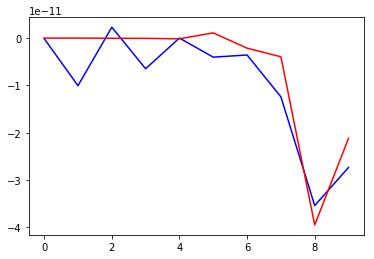

In [154]:
x = np.arange(0, 10, 1)
y = predict_function(x)
xs = sin_poly_feature_mapping(x, 3)
w = ml_weights(xs, y)
ys = linear_model_predict(xs, w)
plt.plot(x, ys, 'b', x, y, 'r')
plt.show()

### The Moore-Penrose pseudo-inverse

$$\mathbf{w} = (X^TX)^{-1}X^Tt = X^\dagger t$$

where $X^\dagger$ is known as the Moore-Penrose pseudo-inverse of $\mathbf{X}$

**Properties of Moore-Penrose pseudo-inverse $X^\dagger$**
- Dimension of $X^\dagger$ ($M \times N$) is the inverse of $X$ ($N \times M$)
- $AA^\dagger A = A$
- $AA^\dagger \neq I$
- If $A$ is quare and invertible then $A^\dagger = A^{-1}$
- Can be problematic if $A^T A$ is (close to) singular, which may have zero or infinite solutions.

### Basis Functions

Now we are going to introduce basis functions to adapt our simple linear regression to solve polynomial equations

Consider **simple linear regression** with vector inputs

$$y(\mathbf{x},\mathbf{w}) = w_0 + \sum_{d=1}^{D}w_dx_d$$

substitute input data, $\mathbf{x} = (x_1, \ldots, x_D)$ with basis functions $\mathbf{\phi}(\mathbf{x}) = (\phi_1(\mathbf{x}), \ldots, \phi_m(\mathbf{x}))$

$$y(\mathbf{x},\mathbf{w}) = w_0 + \sum_{j=1}^{M-1}w_j\phi_j(\mathbf{x})$$

Important: **Linear Model Prediction:**

$$y(\mathbf{x},\mathbf{w}) = \mathbf{w}^T\phi(\mathbf{x})$$

where $\phi(\mathbf{x})$ is **feature vector** defined as:

$$\phi(x) = (\phi_0(x), \phi_1(x), \ldots, \phi_{M-1}(x))^T$$

**Forms** of basis functions:
* $\phi_j(\mathbf{x}) = x^j$ **polynomial basis function**
* $\phi_j(\mathbf{x}) = exp[-\frac{(x-\mu_j)^2}{2s^2}]$ **gaussian basis function** ($\mu_j$ governs location, s the scale. No normalisation required)
* $\phi_j(\mathbf{x}) = \sigma(\frac{x-\mu_j}{s})$ **logistic basis function** where $\sigma(a) = \frac{1}{1+exp(-a)}$

In [ ]:
# this is the feature mapping for a polynomial of given degree in 1d
def feature_mapping(inputs, degree):
    """
    Create a design matrix from a 1d array of input values, where columns
    of the output are powers of the inputs from 0 to degree (inclusive)

    So if input is: inputs=np.array([x1, x2, x3])  and degree = 4 then
    output will be design matrix:
        np.array( [[  1.    x1**1   x1**2   x1**3   x1**4   ]
                   [  1.    x2**1   x2**2   x2**3   x2**4   ]
                   [  1.    x3**1   x3**2   x3**3   x3**4   ]])
    """
    expanded_inputs = []
    for i in range(degree+1):
        expanded_inputs.append(inputs**i)
    """
    expanded_inputs =
    np.array( [[ x1**1  x2**1  x3**1 ]
               [ x1**2  x2**2  x3**2 ]
               [ x1**3  x2**3  x3**3 ]
               [ x1**4  x2**4  x3**4 ]])
    ----
    Here we will transpose expanded_inputs
    """
    return np.array(expanded_inputs).transpose()

## Ridge Regression

Ridge regression is a regulation method that prevents linear model overfitting.

Assume model is $t = y(x;\mathbf{w})+\epsilon$, where $\epsilon \sim \mathcal{N}(.|0, \beta^{-1})$

we can write:

$$p(t|\mathbf{x},\mathbf{w}, \beta) = \mathcal{N}(t|y(\mathbf{x};\mathbf{w}),\beta^{-1}$$

The conditional mean is:

$$E[t|\mathbf{x},\mathbf{w}, \beta] = \int t\ p(t|\mathbf{x},\mathbf{w},\beta)dt = y(\mathbf{x},\mathbf{w})$$

maximum likelihood is:

$$p(\mathbf{t}|\mathbf{X},\mathbf{w},\beta) = \prod_{n=1}{N}\mathcal{N}(t_n|\mathbf{w}^T\phi(x_n),\beta^{-1})$$

log likelihood is:

$$
\begin{align}
ln\ p(\mathbf{t}|\mathbf{X},\mathbf{w},\beta) & = \sum_{n=1}{N}ln\mathcal{N}(t_n|\mathbf{w}^T\phi(x_n),\beta^{-1})\\
& = \frac{N}{2}ln\beta - \frac{N}{2}ln(2\pi) - \beta E_D(\mathbf{w})
\end{align}
$$

replace $E_D(\mathbf{w})$ with **sum of squares error**

$$E_D(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^{N}(t_n - \mathbf{w}^T\phi(x_n))^2$$

differentiate the log likelihood and set it to 0:

$$\nabla_\mathbf{w}ln\ p(\mathbf{t}|\mathbf{X},\mathbf{w},\beta) = \beta\nabla_\mathbf{w}E_D(\mathbf{w}) = 0$$

rewrite error function as:

$$E_D(\mathbf{w}) = \frac{1}{2}(\mathbf{t}-\Phi\mathbf{w})^T(\mathbf{t}-\Phi\mathbf{w})$$

where we define $\Phi$ as:

$$ \mathbf{\Phi} = 
\left(
\begin{array}{cc}
    \phi_0(\mathbf{x_1}) & \phi_1(\mathbf{x_1}) & \ldots & \phi_{M-1}(\mathbf{x_1})\\
    \phi_0(\mathbf{x_2}) & \phi_1(\mathbf{x_2}) & \ldots & \phi_{M-1}(\mathbf{x_2})\\
    \vdots & \vdots & \ddots & \vdots\\
    \phi_0(\mathbf{x_N}) & \phi_1(\mathbf{x_N}) & \ldots & \phi_{M-1}(\mathbf{x_N})\\
\end{array}
\right)
$$

### Update Error Function with Ridge Penalty Function

To **regularise** the fit, we will change the **loss function** by adding a **penalty function** in the end

Before:
$$E_D(\mathbf{w}) = \frac{1}{2}(\mathbf{t}-\Phi\mathbf{w})^T(\mathbf{t}-\Phi\mathbf{w})$$

After: ( **ridge regression** )

$$E_W(\mathbf{w}) = \frac{1}{2}\mathbf{w}^T\mathbf{w} = \frac{1}{2}||\mathbf{w}||^2$$ 

$$E(\mathbf{w}) = E_D(\mathbf{w})+E_W(\mathbf{w})$$

where $\lambda$ is the **regularization coefficient**, controlling the relative importance of the two error terms.

### Regularized Weights Linear Model:

$$w^* = (\lambda I + \Phi^T\Phi)^{-1}\Phi^T t$$

In [145]:
def regularised_ml_weights(m_X, targets, reg_param):
    """
    This method returns the weights that give the best linear fit between
    the processed inputs and the targets penalised by some regularisation term
    (reg_param)
    """
    Phi = np.matrix(m_X)
    targets = np.matrix(targets).reshape((len(targets),1))
    I = np.identity(Phi.shape[1])
    weights = linalg.inv(reg_param*I + Phi.transpose()*Phi)*Phi.transpose()*targets
    return np.array(weights).flatten()

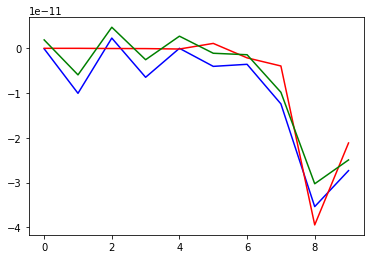

In [158]:
#expand array x into feature matrix
xs = sin_poly_feature_mapping(x, 3)
w_r = regularised_ml_weights(xs, y, 0.8)
w = ml_weights(xs, y)
ys = linear_model_predict(xs, w)
yr = linear_model_predict(xs, w_r)
plt.plot(x, ys, 'b', x, y, 'r', x, yr, 'g')
plt.show()

### Lasso

Penalty function:
$$E_W(\mathbf{w}) = \frac{1}{2}\sum_{j=1}{M}|w_j|$$

**Properties** of lasso:
- if $\lambda$ is sufficiently large, can lead to a **sparse model**, where most weight coefficients $w_j$ are exactly zero.
- sparse model can be more **robust** (resistant to over-fitting)
- no general closed form solution for $w^*$